### Linear Regression using statsmodels

In [29]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.90e-08
Time:                        13:00:21   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Naive Bayes Classifier

In [11]:
iris = datasets.load_iris()

from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

# trainset accuracy
print("Mislabeled points out of a total %d points : %d"  % (iris.data.shape[0],(iris.target != y_pred).sum()))

mnb = MultinomialNB()

y_pred = mnb.fit(iris.data, iris.target).predict(iris.data)

# trainset accuracy
print("Mislabeled points out of a total %d points : %d"  % (iris.data.shape[0],(iris.target != y_pred).sum()))

Mislabeled points out of a total 150 points : 6
Mislabeled points out of a total 150 points : 7


### Support Vector Machine

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [ ]:
# 그래프를 그리기 위한 준비단계 

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel : N-d array to 1-d array
                                                                       # np.c_: 2개의 열을 붙여 2-d array로
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

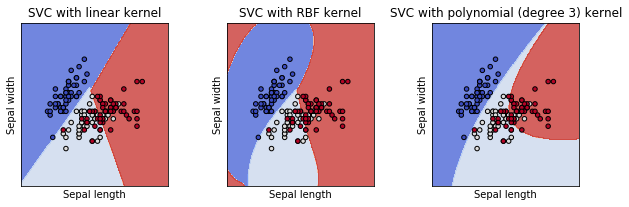

In [27]:
X = iris.data[:, :2] # Take the first two features. 
y = iris.target

C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


fig, sub = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
fig.set_size_inches(w=10,h=3)
plt.show()

### Soft-margin SVM의 C 선택하기

C= 0.001


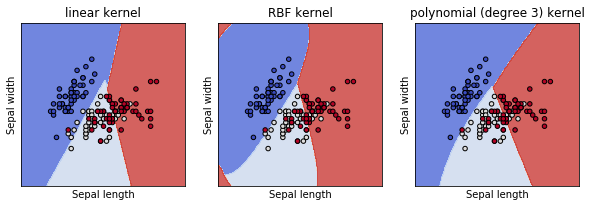

C= 0.01


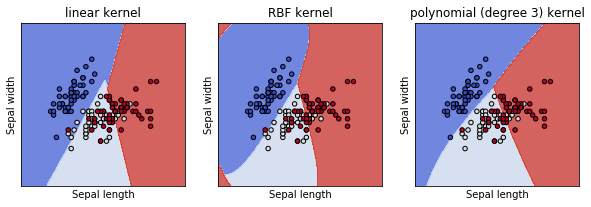

C= 0.1


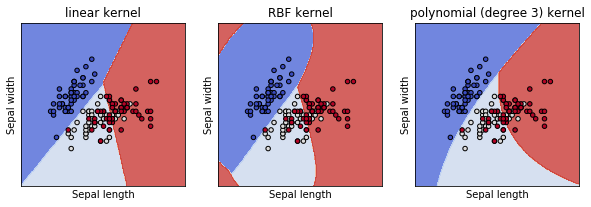

C= 0.5


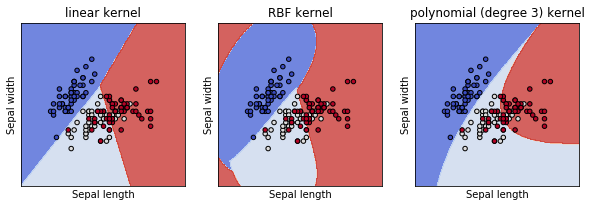

C= 1.0


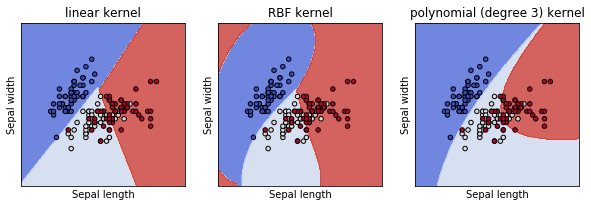

C= 10


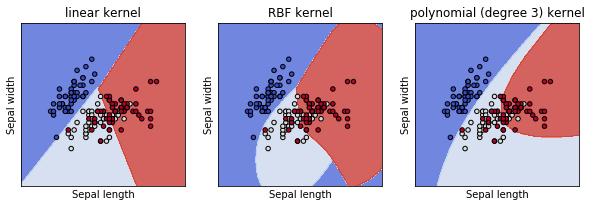

C= 100


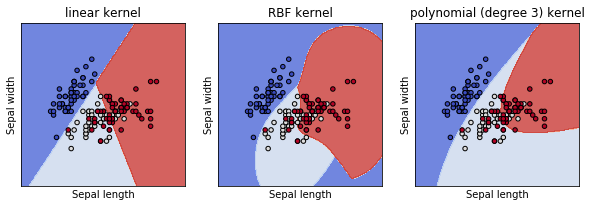

In [25]:
for C in [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100]:
    print("C=", C)
    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('linear kernel', 'RBF kernel', 'polynomial (degree 3) kernel')

    # Set-up 1x3 grid for plotting.
    fig, sub = plt.subplots(1, 3)
    #plt.subplots_adjust(wspace=0, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    fig.set_size_inches(w=10,h=3)
    plt.show()